In [9]:
# Use HMM for classification of your speech signal using STFT features
import librosa
import numpy as np
import os
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from hmmlearn import hmm

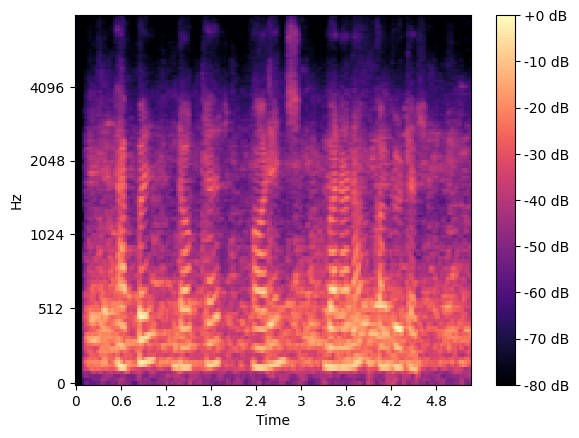

In [10]:
import librosa
import matplotlib.pyplot as plt

def plot_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')

y1, sr = librosa.load('Audio/All.ogg', sr=16000)
plot_spectrogram(y1, sr)


In [12]:
#HMM for classification of your speech signal using STFT features
def get_mfcc_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfccs
get_mfcc_features(y1, sr)

array([[-5.6858673e+02, -5.6858673e+02, -5.6824573e+02, ...,
        -2.4037828e+02, -2.4733179e+02, -2.5266855e+02],
       [ 0.0000000e+00,  0.0000000e+00,  4.1460794e-01, ...,
         1.6773718e+02,  1.6798563e+02,  1.6581482e+02],
       [ 0.0000000e+00,  0.0000000e+00,  2.3094809e-01, ...,
        -3.9140892e+01, -3.7588684e+01, -3.2888767e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  2.7806640e-01, ...,
         9.6224928e+00, -1.4466612e+00, -5.6153625e-01],
       [ 0.0000000e+00,  0.0000000e+00,  4.2606393e-01, ...,
        -7.1682234e+00, -1.5169243e+01, -1.3122356e+01],
       [ 0.0000000e+00,  0.0000000e+00,  4.5308903e-01, ...,
        -1.5742424e+01, -1.6608753e+01, -1.3909155e+01]], dtype=float32)

In [13]:
import numpy as np
import librosa
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Load the audio file
signal, sr = librosa.load('Audio/All.ogg')

# Compute STFT features
stft_features = np.abs(librosa.stft(signal))

# Flatten the features and standardize them
stft_features_flattened = stft_features.flatten()[:, np.newaxis]
scaler = StandardScaler()
stft_features_scaled = scaler.fit_transform(stft_features_flattened)

# Train an HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(stft_features_scaled)

# Use the trained HMM for classification
labels = model.predict(stft_features_scaled)

print(labels)

[0 0 0 ... 0 0 0]
